# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Magic matplotlib command to have plots shown in the notebook
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [2]:
url="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

### Step 3. Assign it to a variable called `chipo`.

In [3]:
chipo=pd.read_csv(url,'\t')

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Step 4. Display the first 10 entries.

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a barplot of the top 5 items ordered

In [5]:
# Find the top 5 items ordered

order=chipo.groupby('item_name').agg({'quantity':'sum'})
order1=order.sort_values('quantity',ascending=False)[0:5]
order1

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


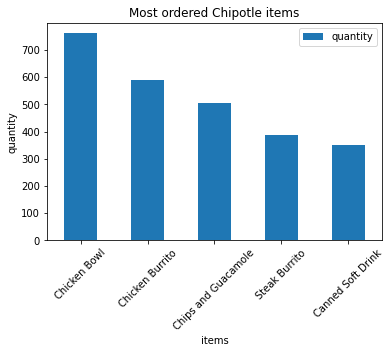

In [10]:
# Plot the graph(barplot)

order1.plot(kind='bar')  # Create the plot
plt.title('Most ordered Chipotle items')  # Set the title and labels
plt.xlabel('items')
plt.ylabel('quantity')
plt.xticks(rotation=45)  # Rotate x labels
plt.show() # Show the plot

### Step 6. Create a scatter plot with the order price as a function of the number of items ordered
#### Hint: Price should be in the Y-axis and Items ordered in the X-axis

In [7]:
# Create a list of prices 

price=chipo.item_price.str.slice(1).astype(float)
chipo['item_price']=price

In [8]:
# Groupby orders and sum

orders=chipo.groupby('order_id').sum()
orders

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


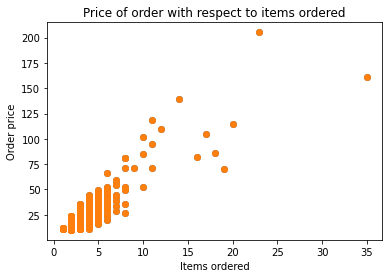

In [12]:

# Create a scatter plot

plt.scatter(orders.quantity,orders.item_price)

# Set the titles and labels

plt.xlabel('Items ordered')
plt.ylabel('Order price')
plt.title('Price of order with respect to items ordered')
plt.scatter(orders.quantity,orders.item_price)
plt.show()

### BONUS: Create a question and a graph to answer your own question.